# Customer Churn Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from itertools import product
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.shape

(10000, 14)

In [7]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

n = (df.dtypes != 'object')
num_cols = list(n[n].index)

print("Numerical variables:")
print(num_cols)

Categorical variables:
['Surname', 'Geography', 'Gender']
Numerical variables:
['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [8]:
print(df['Geography'].unique())
print(df['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Including only Potential Predictors as independent varibles
df1 = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [11]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

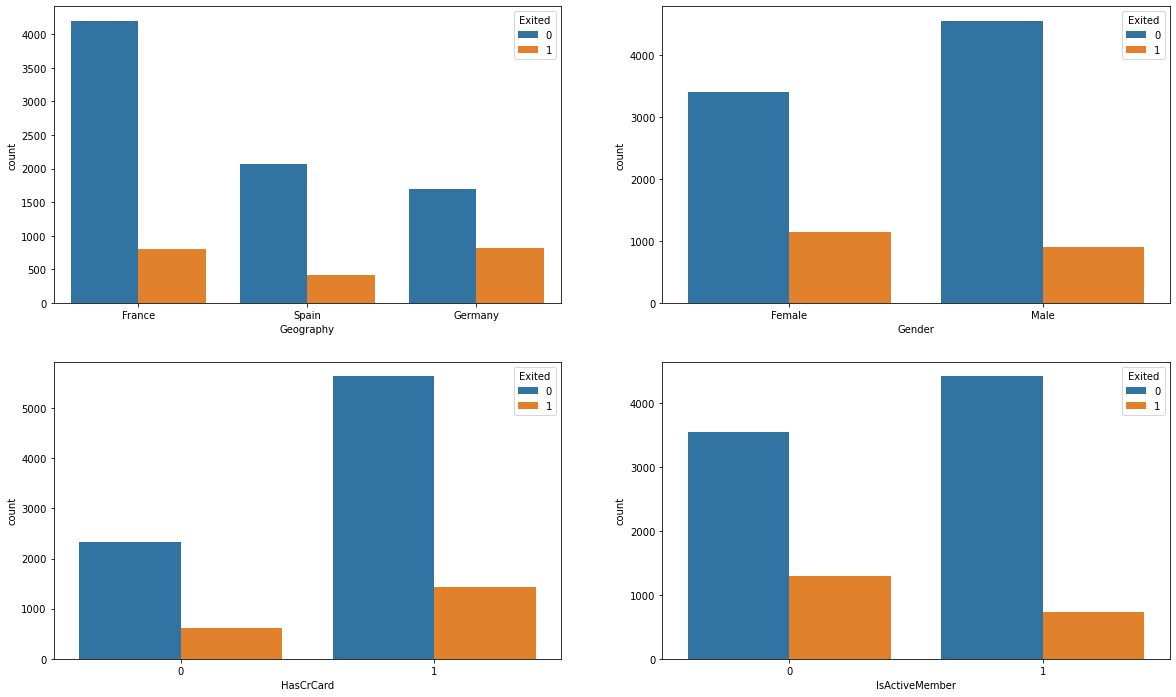

In [12]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df1, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df1, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df1, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df1, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

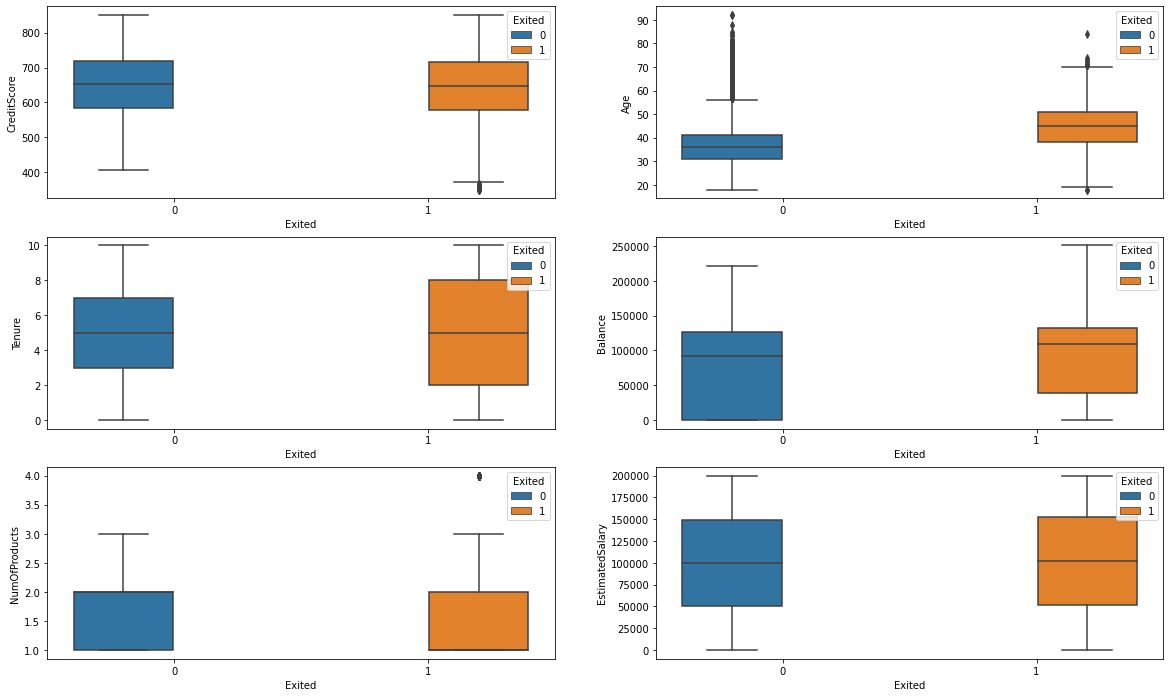

In [13]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df1 , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[2][1])

<AxesSubplot:>

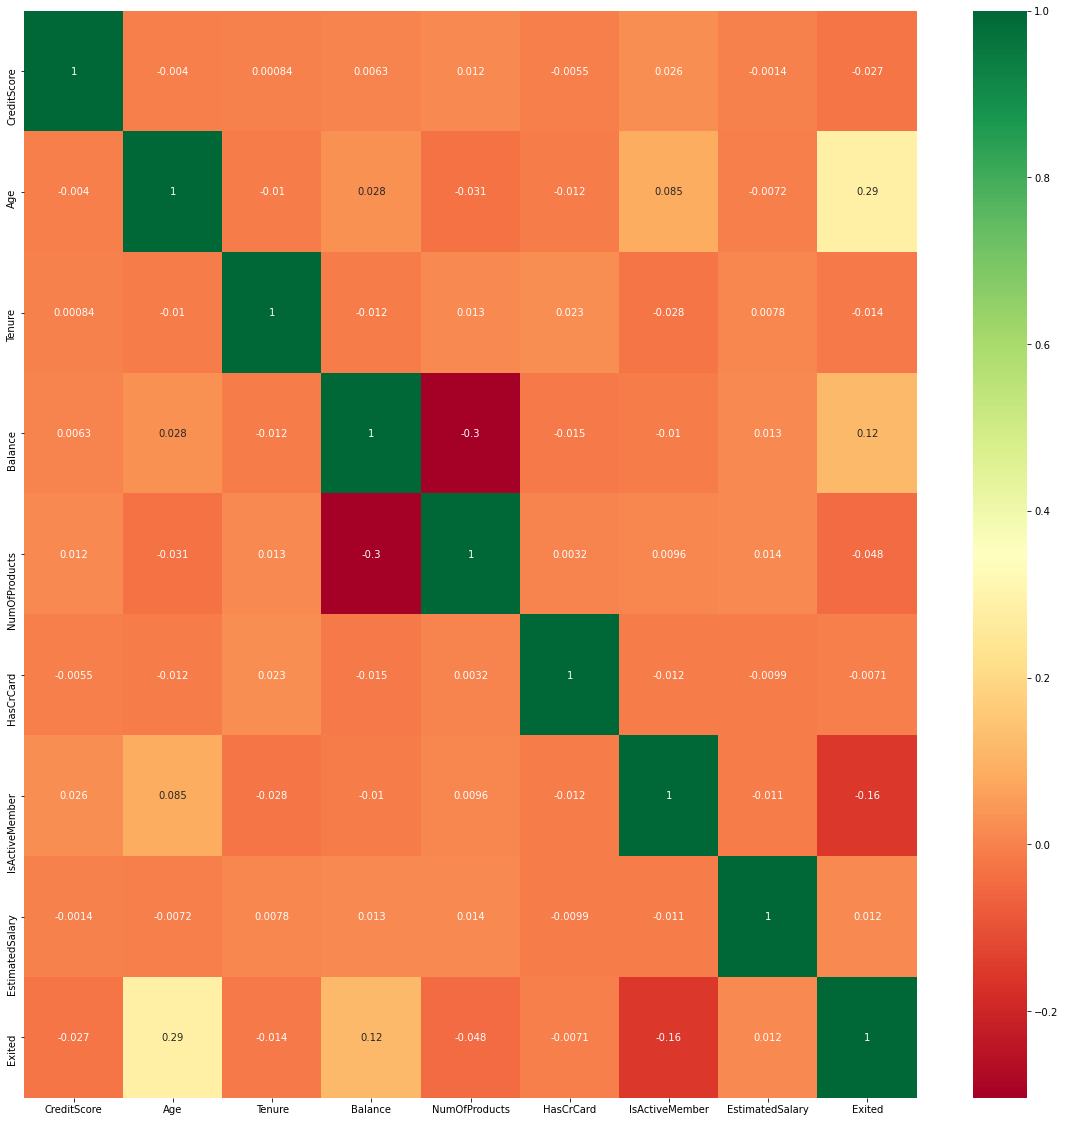

In [14]:
# Plotting The Correlations between all the features
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df1[top_corr_features].corr(), annot=True, cmap='RdYlGn')

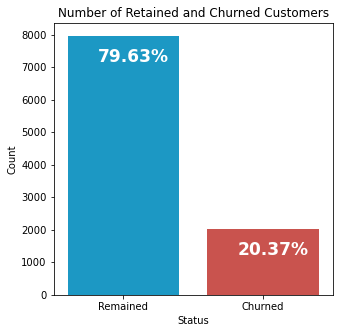

In [15]:
colors = ['#00A5E0', '#DD403A']
label_size = 17
fig = plt.figure(figsize = (5, 5))
sns.countplot(x = 'Exited', data = df1, palette = colors)

for index, value in enumerate(df1['Exited'].value_counts()):
    label =  '{}%'.format(round( (value/df1['Exited'].shape[0])*100, 2)) 
    plt.annotate(label, xy = (index - 0.18, value - 800), color = 'w', fontweight = 'bold', size = label_size)

plt.title('Number of Retained and Churned Customers')
plt.xticks([0, 1], ['Remained', 'Churned'])
plt.xlabel('Status')
plt.ylabel('Count');

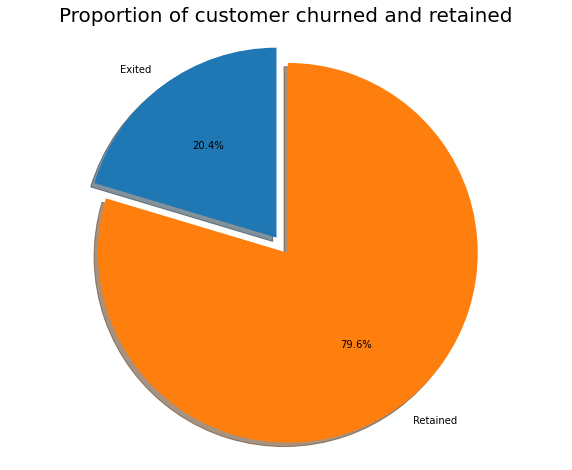

In [16]:
labels = 'Exited', 'Retained'
sizes = [df1.Exited[df1['Exited']==1].count(), df1.Exited[df1['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [17]:
le=LabelEncoder()
for i,v in enumerate([ 'Geography', 'Gender']):

    df1.loc[:,v]=le.fit_transform(df1.loc[:,v])
    df_LE = df1.copy()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [18]:
df_LE.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [19]:
X = df_LE.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
y = df_LE.iloc[:, 10].values

In [20]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [21]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [22]:
X.shape,y.shape

((10000, 10), (10000,))

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
smpl = SMOTE()
X_res,y_res=smpl.fit_resample(X,y)

In [25]:
X_res.shape,y_res.shape

((15926, 10), (15926,))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2, random_state = 42)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 1. Logistic Regression 

In [33]:
lr = LogisticRegression(random_state=0)

In [34]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [35]:
y_pred_lr = lr.predict(X_test)

### Confusion Matrix

In [36]:
cm = confusion_matrix(y_test,y_pred_lr)
print(cm)


[[1232  401]
 [ 315 1238]]


### Accuracy Score:

In [37]:
print(accuracy_score(y_test,y_pred_lr)*100)

77.52667922159448


## 2. Decision Trees Classifier:

In [38]:
dt = DecisionTreeClassifier()

In [39]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred_dt = dt.predict(X_test)

### Confusion Matrix

In [41]:
cm = confusion_matrix(y_test,y_pred_dt)
print(cm)

[[1284  349]
 [ 286 1267]]


### Accuracy Score:

In [42]:
print(accuracy_score(y_test,y_pred_dt)*100)

80.06905210295041


## 3. Random Forest Classifier:

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
y_pred_rf = rf.predict(X_test)

### Confusion Matrix

In [40]:
cm = confusion_matrix(y_test,y_pred_rf)
print(cm)

[[1400  233]
 [ 174 1379]]


### Accuracy Score:

In [41]:
print(accuracy_score(y_test,y_pred_rf)*100)

87.22536095417452


## 4. KNN Classifier 

In [42]:
knn = KNeighborsClassifier(n_neighbors=3)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
y_pred_knn = knn.predict(X_test)

### Confusion Matrix

In [45]:
cm = confusion_matrix(y_test,y_pred_knn)
print(cm)

[[1322  311]
 [ 214 1339]]


### Accuracy Score:

In [46]:
print(accuracy_score(y_test,y_pred_knn)*100)

83.52165725047081


## 5. AdaBoost

In [50]:
ab = AdaBoostClassifier()

In [51]:
ab.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [52]:
y_pred_ab = ab.predict(X_test)

### Confusion Matrix

In [53]:
cm = confusion_matrix(y_test,y_pred_ab)
print(cm)

[[1350  283]
 [ 241 1312]]


### Accuracy Score:

In [54]:
print(accuracy_score(y_test,y_pred_ab)*100)

83.55304456999372


## 6. Gradient Boosting

In [55]:
gb = GradientBoostingClassifier()

In [56]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [57]:
y_pred_gb = gb.predict(X_test)

### Confusion Matrix

In [58]:
cm = confusion_matrix(y_test,y_pred_gb)
print(cm)

[[1377  256]
 [ 222 1331]]


### Accuracy Score:

In [59]:
print(accuracy_score(y_test,y_pred_gb)*100)

84.99686126804771


## 7. eXtreme Gradient Boosting

In [69]:
xgb = XGBClassifier(eval_metric = 'logloss')

In [70]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [71]:
y_pred_xgb = xgb.predict(X_test)

### Confusion Matrix

In [72]:
cm = confusion_matrix(y_test,y_pred_xgb)
print(cm)

[[1386  247]
 [ 176 1377]]


### Accuracy Score:

In [73]:
print(accuracy_score(y_test,y_pred_xgb)*100)

86.7231638418079


In [47]:
scoring = 'accuracy'

In [68]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ADB', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier(eval_metric = 'logloss')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

KNN: 81.593407 (0.010169)
LR: 77.150706 (0.012383)
CART: 78.767661 (0.009961)
RF: 85.470958 (0.011506)
GB: 83.885400 (0.011510)
ADB: 82.362637 (0.011940)
XGB: 85.525903 (0.011332)


In [49]:
from pycaret import classification
# setup the environment 
classification_setup = classification.setup(data= df1, target='Exited')

,Description,Value
0,session_id,8493
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10000, 11)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [74]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8634,0.8593,0.4664,0.7823,0.5840,0.5086,0.5332,0.2260
rf,Random Forest Classifier,0.8587,0.8474,0.4477,0.7711,0.5654,0.4883,0.5146,0.1750
lightgbm,Light Gradient Boosting Machine,0.8578,0.8516,0.4907,0.7313,0.5868,0.5050,0.5199,0.1960
ada,Ada Boost Classifier,0.8573,0.8433,0.4823,0.7352,0.5821,0.5005,0.5169,0.0840
xgboost,Extreme Gradient Boosting,0.8560,0.8390,0.4976,0.7178,0.5874,0.5036,0.5163,0.5200
et,Extra Trees Classifier,0.8403,0.8281,0.4054,0.6929,0.5107,0.4232,0.4452,0.1770
lda,Linear Discriminant Analysis,0.8308,0.8229,0.3098,0.7031,0.4289,0.3472,0.3879,0.0610
ridge,Ridge Classifier,0.8253,0.0000,0.2232,0.7561,0.3438,0.2765,0.3458,0.0410
dt,Decision Tree Classifier,0.7910,0.6898,0.5177,0.4952,0.5053,0.3731,0.3738,0.0140
lr,Logistic Regression,0.7878,0.6667,0.0588,0.3699,0.1006,0.0520,0.0819,0.6880


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8493, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [75]:
classification_gb = classification.create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8443,0.8724,0.4000,0.7250,0.5156,0.4319,0.4590
1,0.8529,0.8422,0.4276,0.7561,0.5463,0.4664,0.4934
2,0.8800,0.8550,0.5103,0.8506,0.6379,0.5713,0.5981
3,0.8700,0.8617,0.4931,0.7978,0.6094,0.5366,0.5590
4,0.8543,0.8499,0.4375,0.7500,0.5526,0.4727,0.4972
5,0.8671,0.8567,0.4583,0.8148,0.5867,0.5148,0.5451
6,0.8757,0.8669,0.5278,0.8000,0.6360,0.5648,0.5826
7,0.8471,0.8525,0.4097,0.7284,0.5244,0.4418,0.4677
8,0.8671,0.8600,0.4931,0.7802,0.6043,0.5293,0.5494
9,0.8755,0.8761,0.5069,0.8202,0.6266,0.5569,0.5801


In [77]:
predictions = classification.predict_model(classification_gb, data=df1)
# view the predictions
predictions

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Label,Score
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0,0.6779
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,0,0.8417
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,0.9181
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,0.9295
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,0.8534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,0.9647
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,0.9325
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,0,0.8287
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,0,0.8964
